In [3]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.stats as ss



In [2]:
np.random.seed(1)
n_dimensions = 2
noise = np.random.normal( 1, 5, 50).T
x = np.linspace(0 , 100, 50).T
"add a random noise curve to reudce the RMSE , add a random unifomr distribution for 30% of points"
idx_n = np.random.randint(0, len(x) + 1, size=10)
y = 3*x  + 5 + noise
y[idx_n] = x[idx_n]  + 5 + noise[idx_n]
y = y.T
plt.scatter(x,y)
'init uniform distribution over all the set'
prior = (np.ones(len(x)) * 0.5).T
vec = np.vstack((x,y)).T

NameError: name 'np' is not defined

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

# Set random seed for reproducibility
np.random.seed(1)

n_dimensions = 2
x = np.linspace(-10, 10, 200)  # Removed .T
noise = np.random.normal(0, 3, len(x))  # Removed .T

idx_n = np.random.randint(30, len(x), size=int(0.5 * len(x)))
print(len(idx_n))
y = 3*x + 5 + noise
y[idx_n] = -x[idx_n]+ noise[idx_n] + 10

print(len(y))
print(len(y[idx_n]))
# Removed .T as it's unnecessary for 1D arrays

print(y)
# X = np.array([-0.848,-0.800,-0.704,-0.632,-0.488,-0.472,-0.368,-0.336,-0.280,-0.200,-0.00800,-0.0840,0.0240,0.100,0.124,0.148,0.232,0.236,0.324,0.356,0.368,0.440,0.512,0.548,0.660,0.640,0.712,0.752,0.776,0.880,0.920,0.944,-0.108,-0.168,-0.720,-0.784,-0.224,-0.604,-0.740,-0.0440,0.388,-0.0200,0.752,0.416,-0.0800,-0.348,0.988,0.776,0.680,0.880,-0.816,-0.424,-0.932,0.272,-0.556,-0.568,-0.600,-0.716,-0.796,-0.880,-0.972,-0.916,0.816,0.892,0.956,0.980,0.988,0.992,0.00400]).reshape(-1,1)
# y = np.array([-0.917,-0.833,-0.801,-0.665,-0.605,-0.545,-0.509,-0.433,-0.397,-0.281,-0.205,-0.169,-0.0531,-0.0651,0.0349,0.0829,0.0589,0.175,0.179,0.191,0.259,0.287,0.359,0.395,0.483,0.539,0.543,0.603,0.667,0.679,0.751,0.803,-0.265,-0.341,0.111,-0.113,0.547,0.791,0.551,0.347,0.975,0.943,-0.249,-0.769,-0.625,-0.861,-0.749,-0.945,-0.493,0.163,-0.469,0.0669,0.891,0.623,-0.609,-0.677,-0.721,-0.745,-0.885,-0.897,-0.969,-0.949,0.707,0.783,0.859,0.979,0.811,0.891,-0.137]).reshape(-1,1)
# x = X.squeeze()
# y= y.squeeze()

100
200
100
[-20.12696391 -26.5337617  -25.98150018 -27.31438325 -21.19774696
 -30.3970784  -17.95651948 -25.17306794 -21.63082241 -23.03454329
 -17.59860081 -27.86383921 -22.34916116 -22.23256507 -17.37758615
 -23.77706074 -20.69316402 -22.50794711 -19.44622308 -17.52291114
 -22.27170678 -15.23417058 -15.66206201 -16.55784362 -15.06125125
 -19.51349514 -17.5294747  -19.66660479 -17.36145318 -14.66521501
 -18.02975612 -16.84352691  14.7224015  -17.58586818  14.56917618
 -14.48522998  13.0299785   16.98465413  -8.56330704 -11.01507355
  15.40439284  13.21651009  13.53741959  -6.95781208  15.73031271
 -13.34314774  15.94963088  -4.52838032 -10.16716133  16.92698621
  -9.02411216  13.81762232 -12.74916263 -10.06812867  13.94618162
  -6.65721585  16.88880954  17.06466303  15.02761625  -4.55563178
  11.70665542  17.6279512   15.30763368  -6.89930363  -4.23796315
  -5.62872519  -1.70561435  17.82578211   2.05923878  -8.38546891
  -8.22681378  -5.10636241  13.2439303   -0.36144299  13.5097189

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


prior inlier ,probability outlier (0.005868404227036143, 0.02866708816150575) , prior outlier , probability outlier (0.0037171181587354195, 0.01815808009139482)
Normalized Alpha 0.999999999893617 , Normalized Beta 1.0638298751425405e-10 


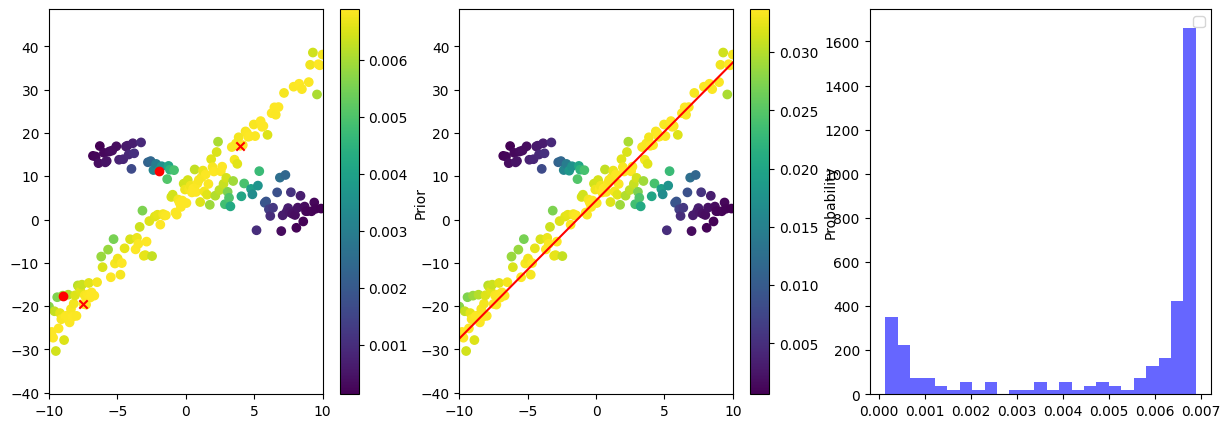

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


prior inlier ,probability outlier (1.001896858173275e-86, 4.606506011628195e-87) , prior outlier , probability outlier (6.908745662475477e-22, 5.01489087556755e-22)
Normalized Alpha 0.19354838708896982 , Normalized Beta 0.8064516129110302 


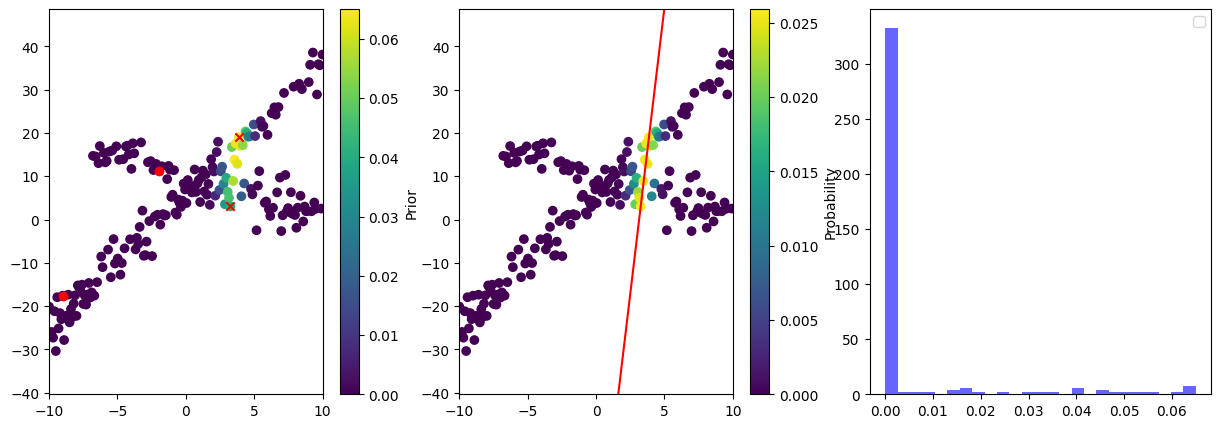

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


prior inlier ,probability outlier (1.1914312001762684e-90, 3.4384896144446826e-06) , prior outlier , probability outlier (6.143291523898193e-22, 0.025711279099836493)
Normalized Alpha 0.5260663507067451 , Normalized Beta 0.4739336492932549 


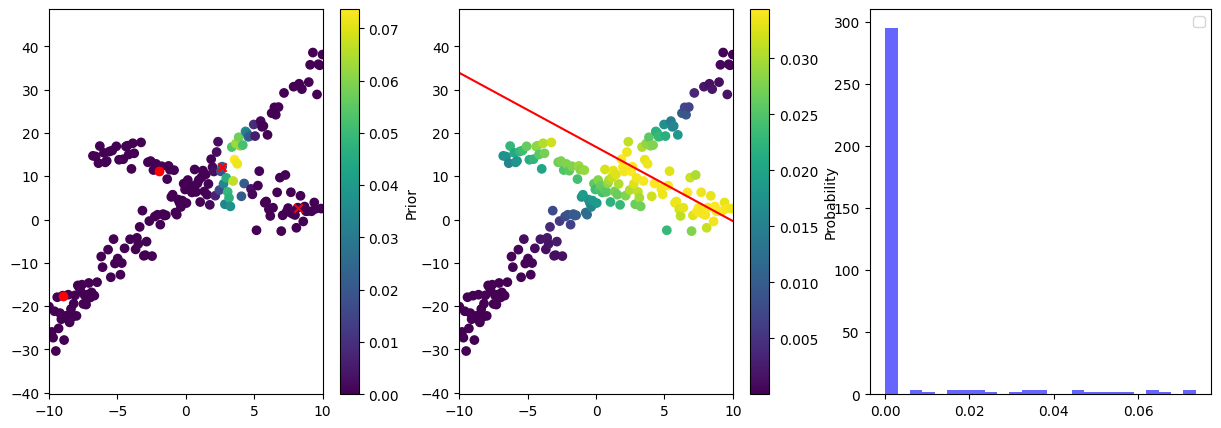

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


prior inlier ,probability outlier (6.108176207205853e-53, 0.0025333643790158775) , prior outlier , probability outlier (0.10335058481196881, 8.313174278686936e-21)
Normalized Alpha 0.15254237288027866 , Normalized Beta 0.8474576271197214 


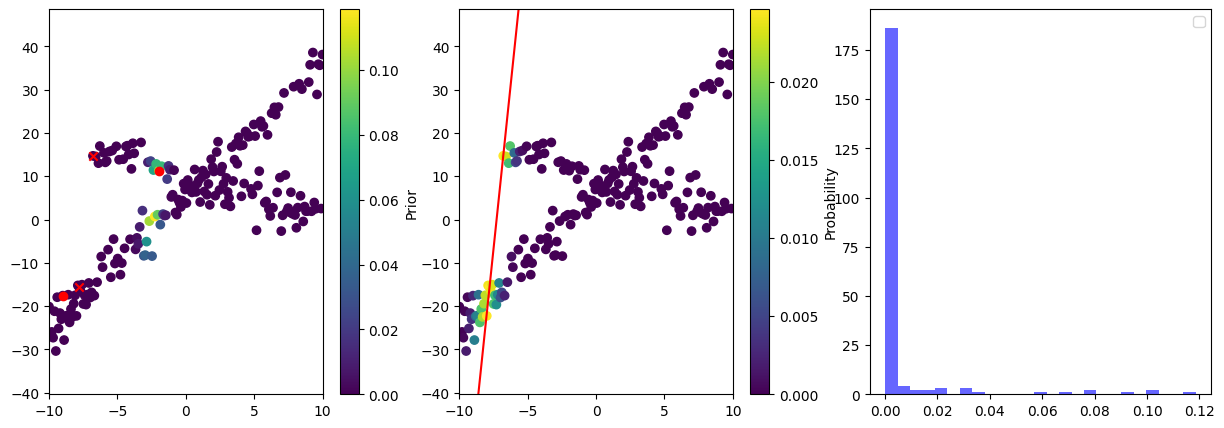

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


prior inlier ,probability outlier (5.899924734400344e-53, 0.026903277989974175) , prior outlier , probability outlier (0.07705996938826506, 0.020767593696585516)
Normalized Alpha 0.5266272189336648 , Normalized Beta 0.47337278106633524 


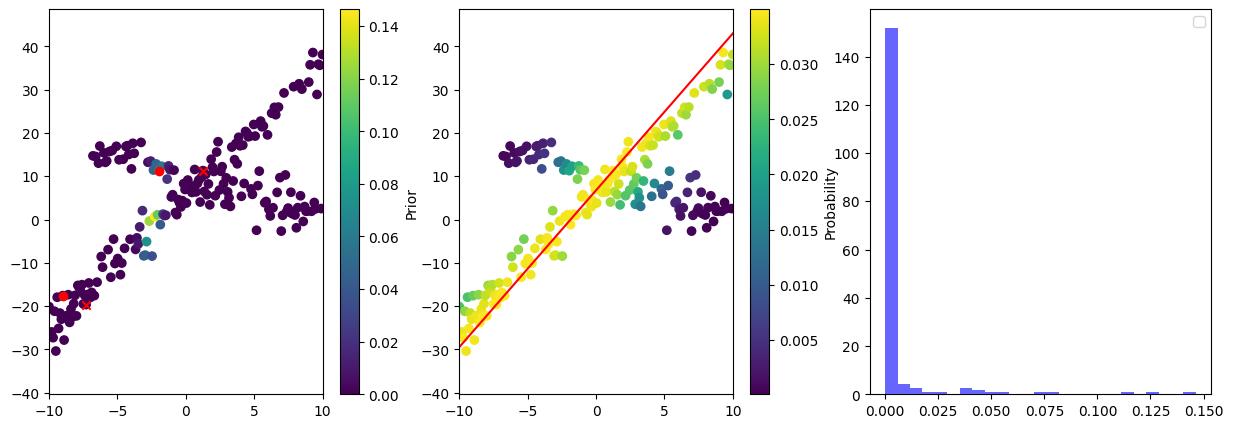

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


prior inlier ,probability outlier (1.2356160271877216e-127, 2.5829824772376253e-101) , prior outlier , probability outlier (1.8058231130719095e-10, 2.890219145688132e-35)
Normalized Alpha 0.11660777385124674 , Normalized Beta 0.8833922261487532 


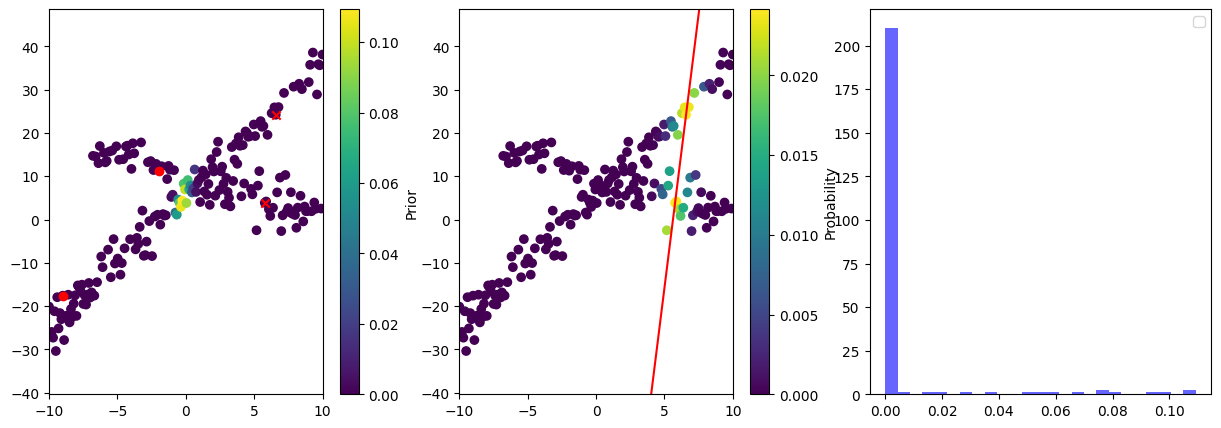

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


prior inlier ,probability outlier (6.108130321326884e-128, 0.013974648795999951) , prior outlier , probability outlier (1.380199732085089e-10, 0.021606422892635375)
Normalized Alpha 0.5321637426894658 , Normalized Beta 0.46783625731053435 


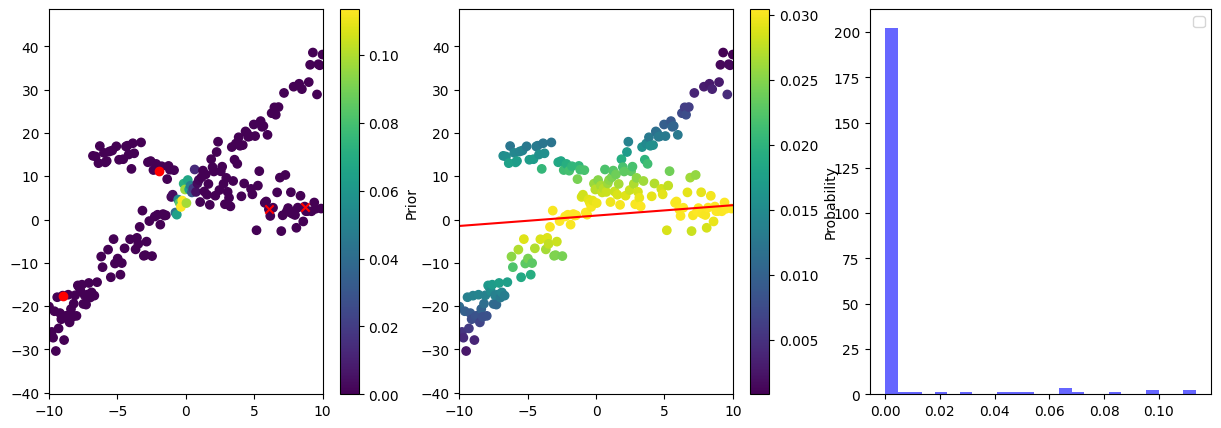

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


prior inlier ,probability outlier (5.288620173282975e-128, 0.02690433529204082) , prior outlier , probability outlier (6.340281289337026e-11, 0.014274298392386957)
Normalized Alpha 0.5231607629423338 , Normalized Beta 0.4768392370576662 


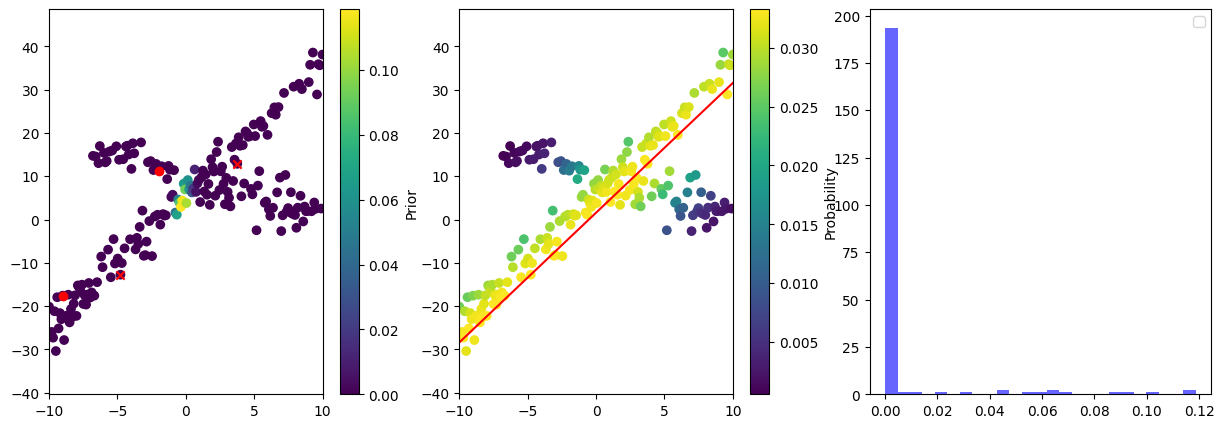

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


prior inlier ,probability outlier (1.5581485728099477e-128, 0.009266128186798155) , prior outlier , probability outlier (6.407812450913696e-11, 0.03178579520772061)
Normalized Alpha 0.5281627838392292 , Normalized Beta 0.47183721616077073 


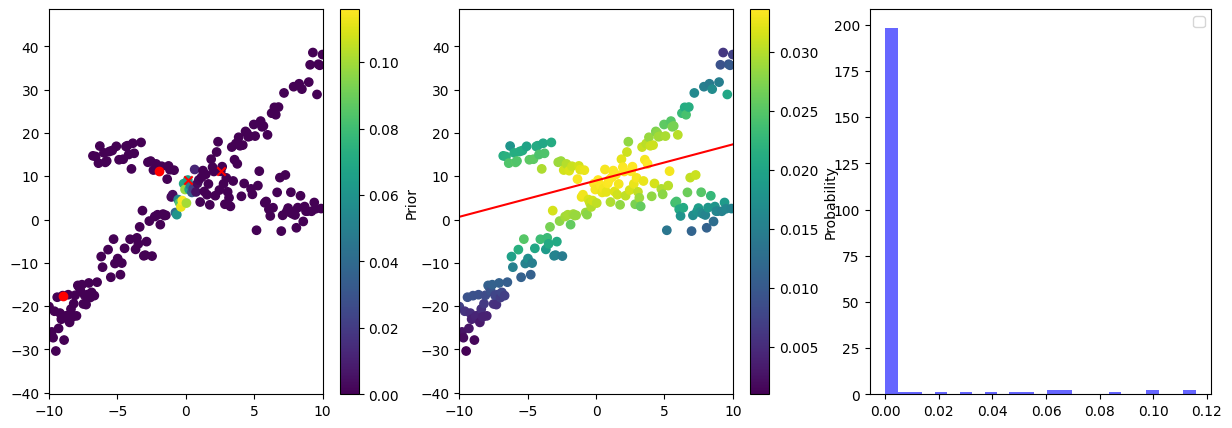

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


prior inlier ,probability outlier (1.6084587694986976e-128, 0.035051486669617035) , prior outlier , probability outlier (4.853564663737048e-11, 0.025719137735291133)
Normalized Alpha 0.5148247978433882 , Normalized Beta 0.48517520215661175 


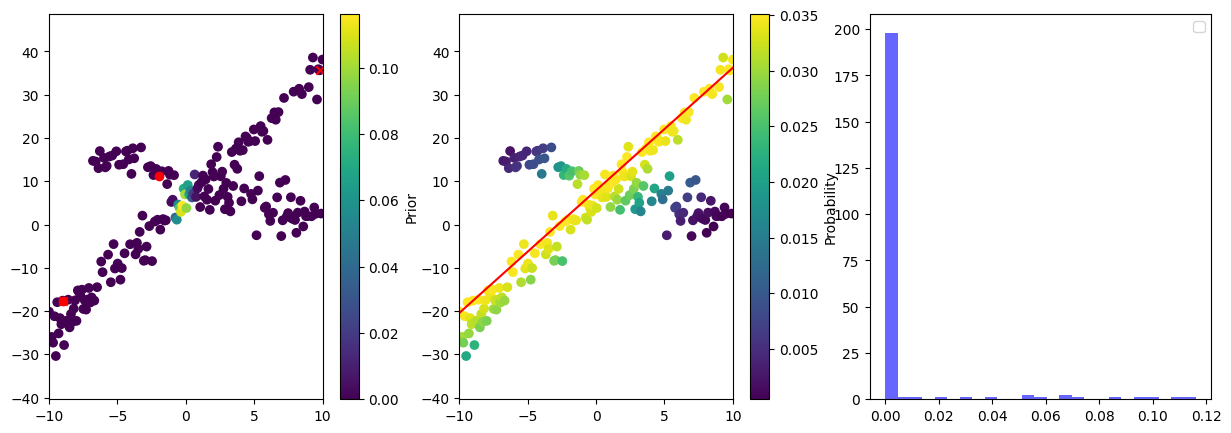

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


prior inlier ,probability outlier (6.818922017105235e-129, 0.014189529893599378) , prior outlier , probability outlier (2.1561878163693918e-11, 0.014869213044751672)
Normalized Alpha 0.4817310183983219 , Normalized Beta 0.5182689816016781 


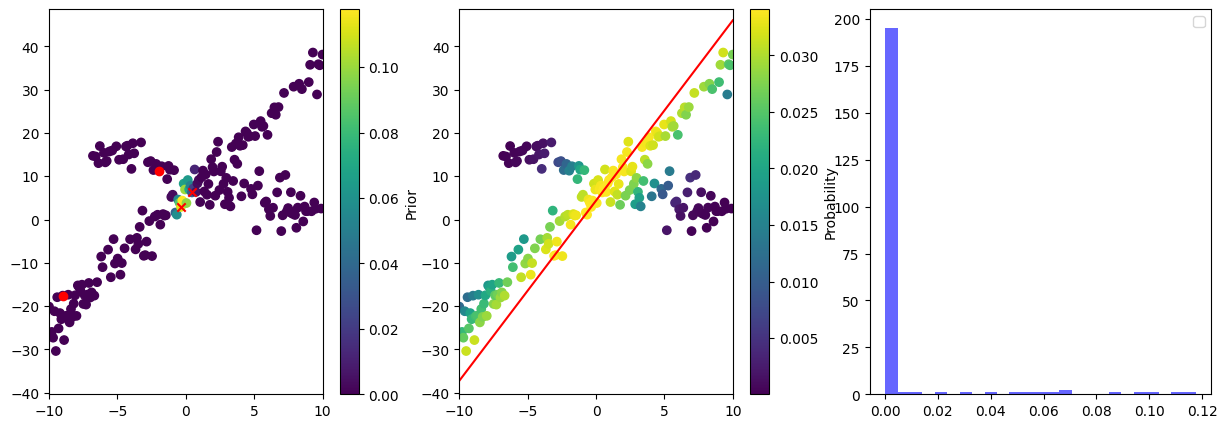

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


prior inlier ,probability outlier (1.1167541674937162e-128, 0.0350190218838006) , prior outlier , probability outlier (8.11102997162854e-12, 0.008043620495651839)
Normalized Alpha 0.5154185022024539 , Normalized Beta 0.484581497797546 


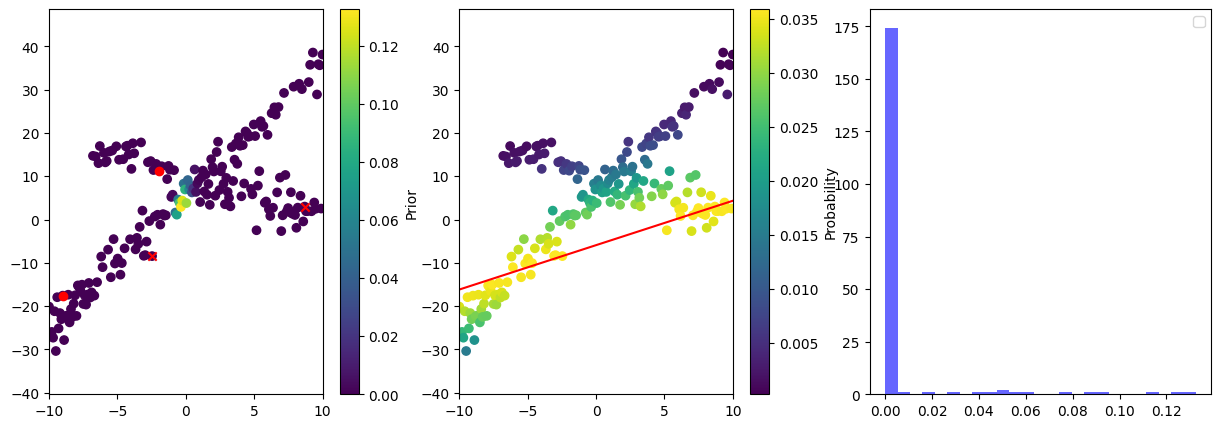

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


prior inlier ,probability outlier (9.456583439572394e-129, 0.02800610424946849) , prior outlier , probability outlier (4.3060286275075835e-12, 0.017558076247170564)
Normalized Alpha 0.5045417010733327 , Normalized Beta 0.49545829892666726 


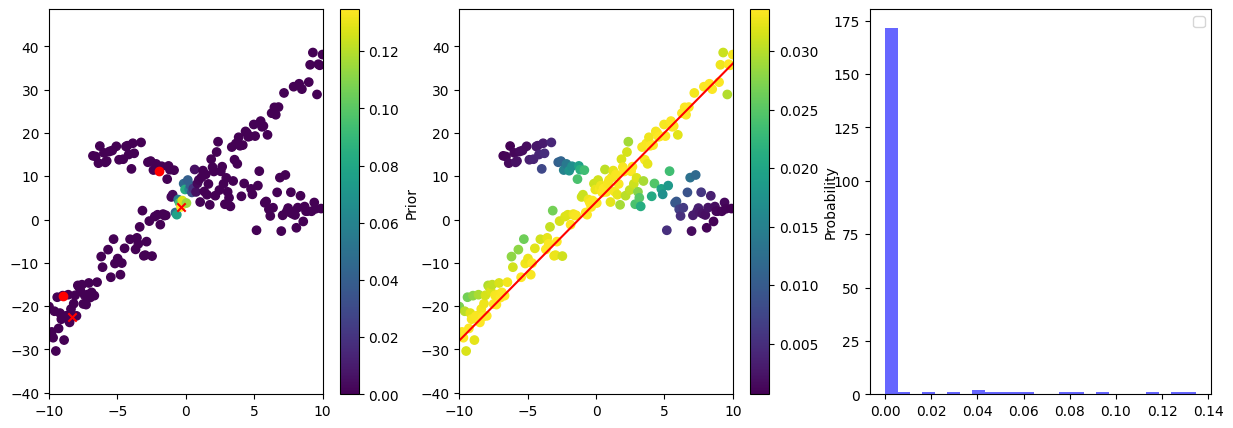

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


prior inlier ,probability outlier (2.3791471924147596e-132, 6.5582540362778e-06) , prior outlier , probability outlier (5.11583579251839e-12, 0.03096997578008319)
Normalized Alpha 0.44182052382983444 , Normalized Beta 0.5581794761701656 


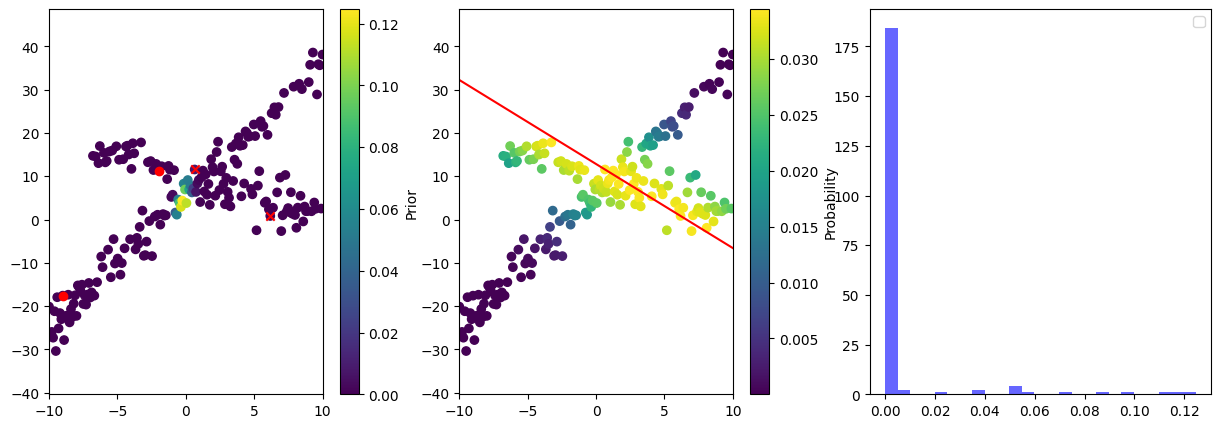

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


prior inlier ,probability outlier (4.957205052379484e-135, 5.04925177976981e-05) , prior outlier , probability outlier (6.6854889090349e-12, 0.03166853927521144)
Normalized Alpha 0.45998071359679593 , Normalized Beta 0.5400192864032041 


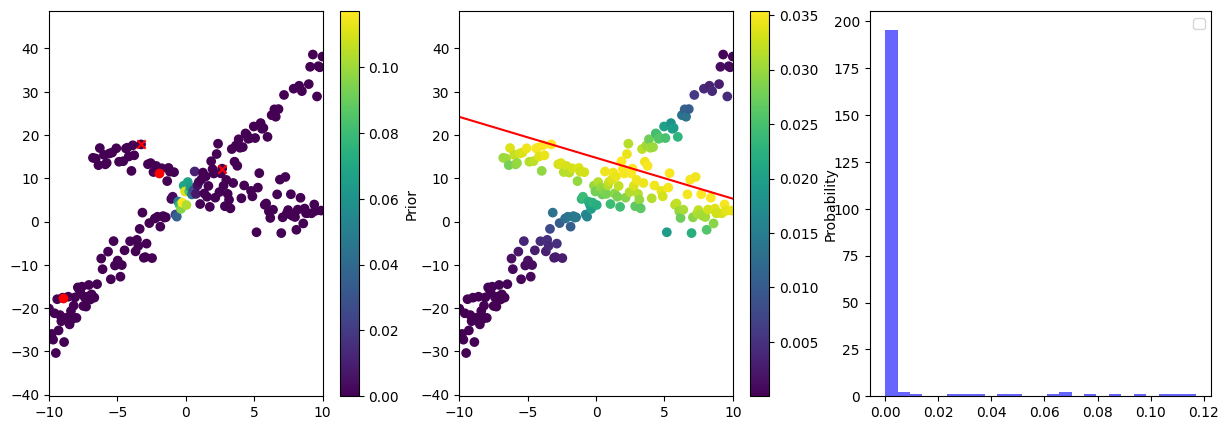

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


prior inlier ,probability outlier (4.9787364357312056e-121, 1.094034331988139e-10) , prior outlier , probability outlier (0.001953356353866474, 3.182709534583445e-16)
Normalized Alpha 0.07862407862404844 , Normalized Beta 0.9213759213759515 


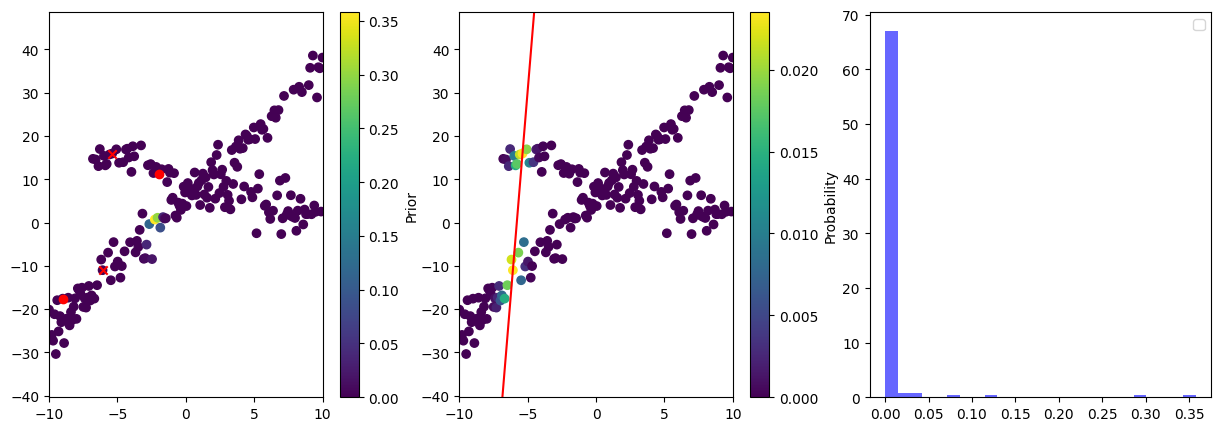

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


prior inlier ,probability outlier (8.825337124783157e-121, 0.03900364556287216) , prior outlier , probability outlier (0.0003348038766395923, 0.0037713950923964003)
Normalized Alpha 0.49566587864451017 , Normalized Beta 0.5043341213554898 


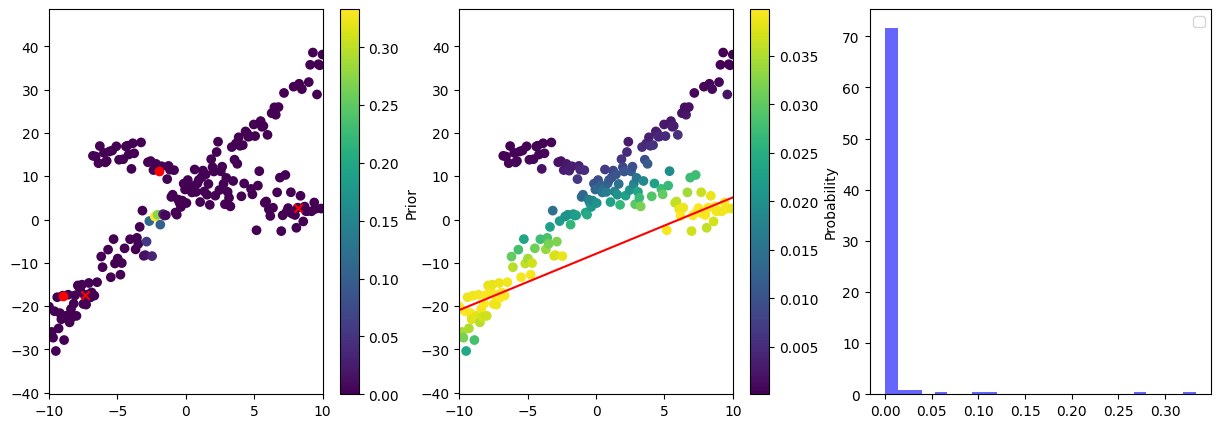

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


prior inlier ,probability outlier (9.399457432067479e-121, 0.021204810151973584) , prior outlier , probability outlier (0.00044733373185942615, 0.026601374508909134)
Normalized Alpha 0.40766550522640194 , Normalized Beta 0.592334494773598 


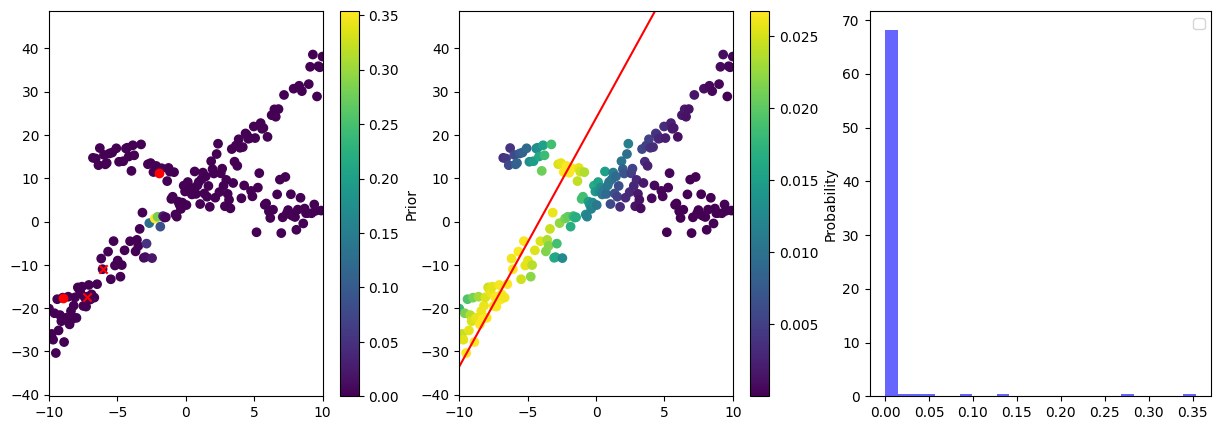

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


prior inlier ,probability outlier (1.6065813171945985e-120, 0.03762717061305761) , prior outlier , probability outlier (6.763341996266381e-05, 0.003328367987820599)
Normalized Alpha 0.4953742640873954 , Normalized Beta 0.5046257359126046 


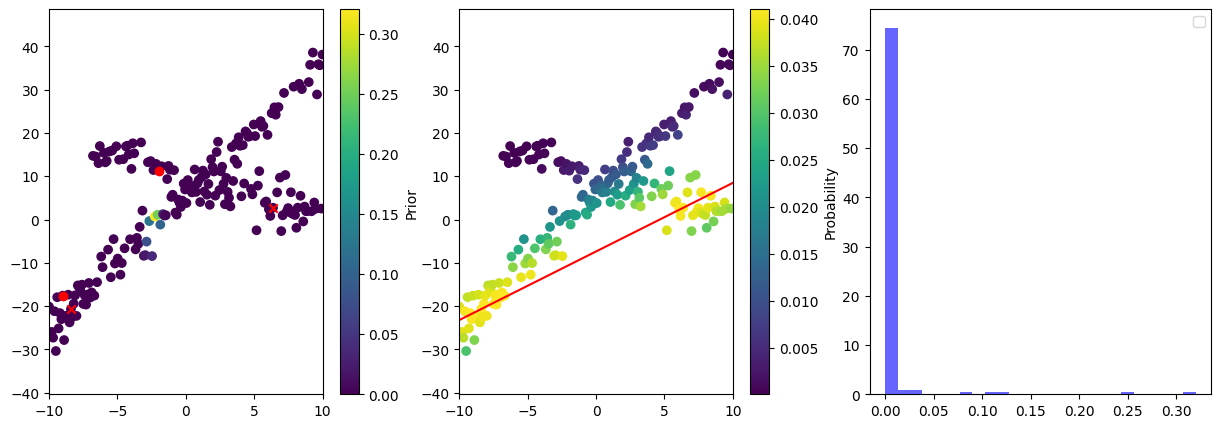

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


prior inlier ,probability outlier (1.810858261595729e-122, 0.00030517626502254324) , prior outlier , probability outlier (4.992862753430924e-05, 0.019987445219824207)
Normalized Alpha 0.3448275862068371 , Normalized Beta 0.6551724137931629 


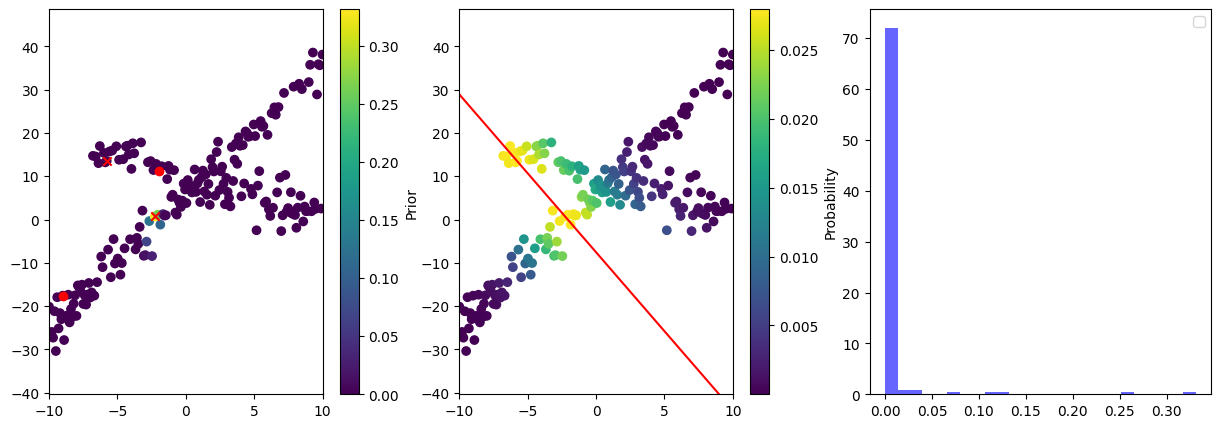

14.262449402482526


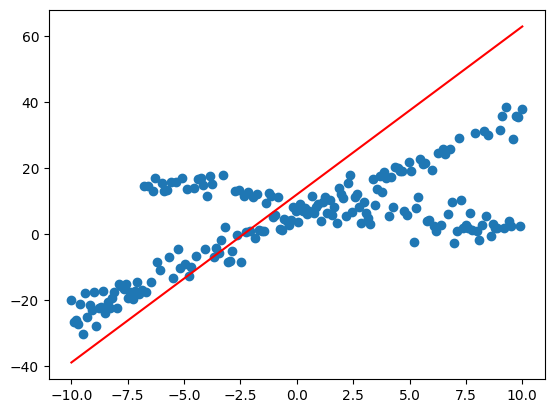

In [101]:
prior = np.ones(len(x))/(np.sum(np.ones(len(x))))
p_min = 1e-10
p_max = 0.1
threshold = 30
uniform_prior = np.ones(len(x))/(np.sum(np.ones(len(x))))
iters = 20
for i in range(iters):

    sampling_idx = np.random.choice(len(x), 2, p=prior, replace=False)

    slope , intercept = np.polyfit(x[sampling_idx], y[sampling_idx], 1)
        
    # slope_m , intercept_m  = np.polyfit(x, y, 2)

    y_hat = intercept + slope * x 
    residuals =y - y_hat
    
    "scaling factor to tell how good a given observation is"
    inliers = residuals[np.where((residuals <= threshold) & (residuals >= -threshold))]
    
    mu = np.mean(0)
    std = np.std(inliers)

    p = ss.norm(mu, std).pdf(residuals)
    
    "as the loop continues give more importance to the prior information rather than the new measurment"
    iteration_factor = i+1/iters+1
    beta = 1 - (1/(i+1 + 1e-10))
    #model the updating as bernulli pmf
    
    
    "if a large portion of the points are covered by a given line make the value of the observation go up"
    n = len(x)
    alpha = len(inliers)/n 
    # prior[np.where(prior <= p_min)] = p_min
    # prior[np.where(prior >= p_max)] = p_max
    "Normalize alpha and beta to get a weighted function for likelihood and prior"
    alpha_n = alpha/(alpha + beta)
    beta_n = beta/(alpha + beta)

    prior = (alpha_n * (p)  * beta_n *(prior)) / np.sum( alpha_n* (p) * beta_n * (prior) )

    # prior[np.where(uniform_prior <= p_min)] = p_min
    # prior[np.where(uniform_prior >= p_max)] = p_max
    
    top_vals = np.argsort(prior)[-150:]
    pt1 = 10
    pt2 = 80
    # pt3 = 198

    fig_width = 15 # Increase the width for a wider plot
    fig_height = 5  # Keep the height unchanged or adjust as needed

    fig, (ax1, ax2 , ax3) = plt.subplots(1, 3, figsize=(fig_width, fig_height))

    sc1 = ax1.scatter(x, y, c=prior, cmap='viridis', label='Data Points')
    # ax1.plot(x, intercept + slope * x , color='red', label='WANSAC')
    fig.colorbar(sc1, ax=ax1, label='Prior')  # Correct usage of colorbar

    sc2 = ax2.scatter(x, y, c=p, cmap='viridis', label='Data Points')  # p should be prior if using the same color mapping as the first plot
    ax2.plot(x, intercept + slope * x, color='red', label='WANSAC')
    ax1.scatter(x[pt1], y[pt1], c="r")
    ax1.scatter(x[pt2], y[pt2], c="r")
    ax1.scatter(x[sampling_idx]  , y[sampling_idx] , marker='x' , c="r")
    fig.colorbar(sc2, ax=ax2, label='Probability')  # Correct usage of colorbar
    ax2.set_xlim([min(x), max(x)])
    ax2.set_ylim([min(y) - 10, max(y) + 10])
    ax1.set_xlim([min(x), max(x)])
    ax1.set_ylim([min(y) - 10, max(y) + 10])

    ax3.hist(prior , bins = 25 , density=True, alpha=0.6, color='b')
    print(f"prior inlier ,probability outlier {prior[pt1] , p[pt1]} , prior outlier , probability outlier {prior[pt2], p[pt2]}")
    "extract the 10 most likely values"
    print(f"Normalized Alpha {alpha_n} , Normalized Beta {beta_n} ")
    plt.legend()
    plt.show()

top_vals = np.argsort(prior)[-20:]
g, i = np.polyfit(x[top_vals], y[top_vals], 1)
plt.scatter(x, y)
plt.plot(x, i + g * x , color='red', label='best fit')
print(std)


updated value of prioir 1  0.00085162872852188 P value 1  0.005710422987659703 residual val 1  38.607927050156235 y_hat and y 189.4215584809948 228.02948553115104
updated value of prioir 2  0.005725846111439433 P value 2 0.005463776863441017 residual val 2  -41.83455630769019 y_hat and y 134.29057689772367 92.45602059003348

(69, 69)


ValueError: 'c' argument has 4761 elements, which is inconsistent with 'x' and 'y' with size 69.

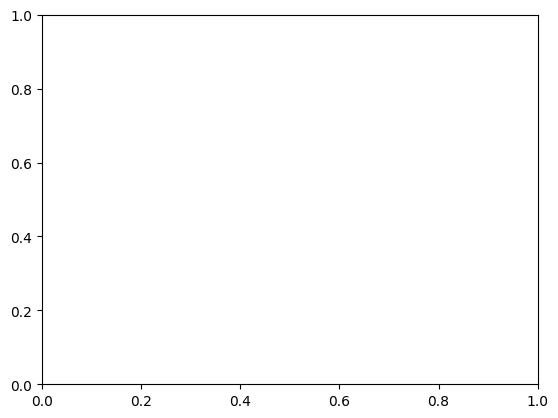

In [196]:
print(prior.shape)
plt.scatter(x, y, c=prior, cmap='viridis', label='Data Points')


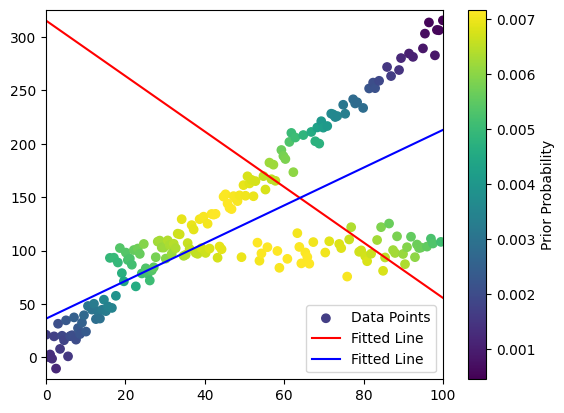

Intercept: 315.1897127533587 Slope: -2.5947127675026858


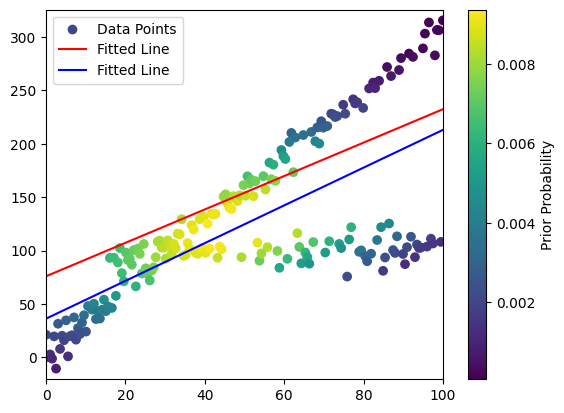

Intercept: 75.956092355802 Slope: 1.5630930412053532


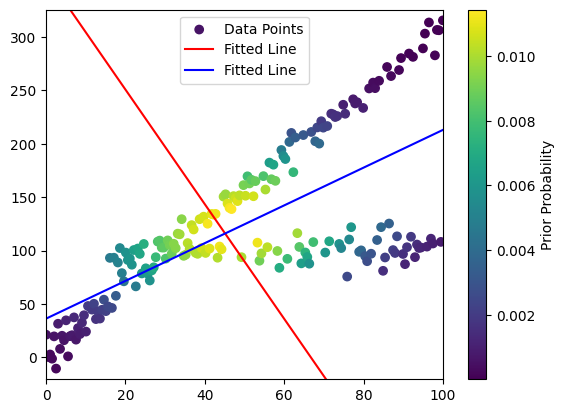

Intercept: 357.91752483533264 Slope: -5.363202971600813


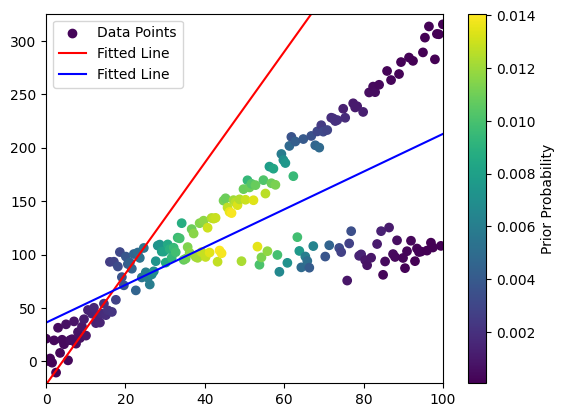

Intercept: -21.595183391852988 Slope: 5.188913404754391


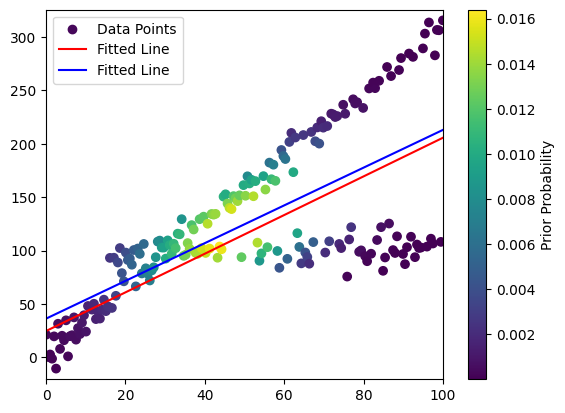

Intercept: 24.707900038469226 Slope: 1.8085608996693399


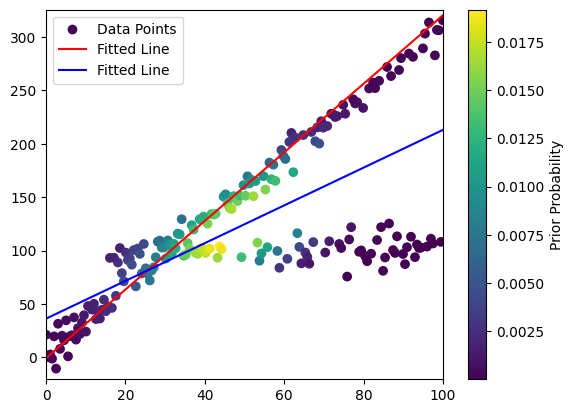

Intercept: -0.6120183937334437 Slope: 3.2084622792489927


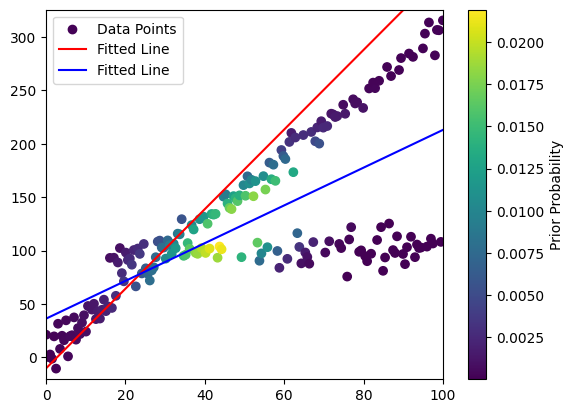

Intercept: -10.208413974075839 Slope: 3.724762663510635


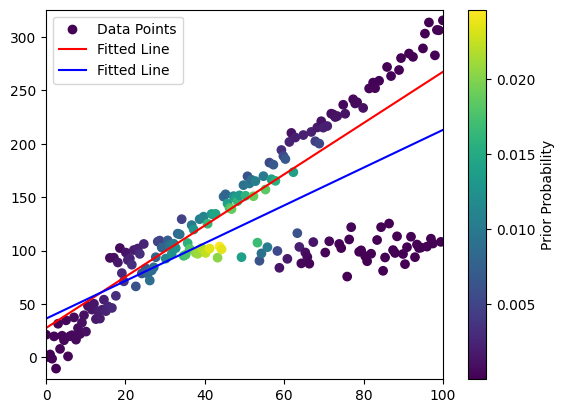

Intercept: 27.52237395265682 Slope: 2.397350497067976


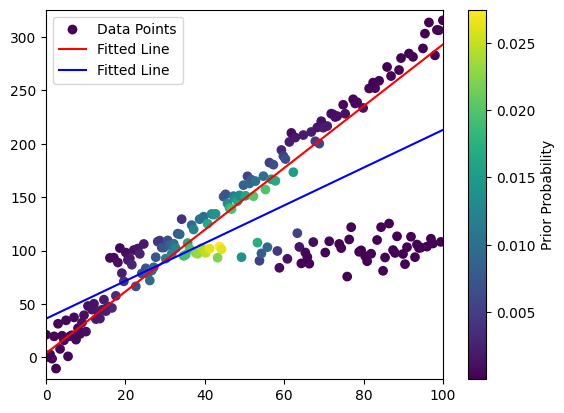

Intercept: 3.861625699779856 Slope: 2.890514002602871


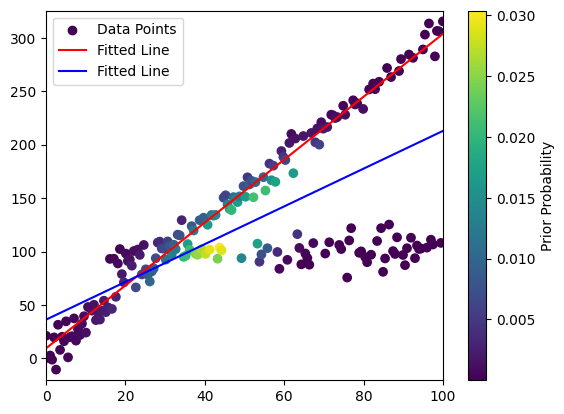

Intercept: 9.478982890348146 Slope: 2.9425432610564575


In [152]:
prior = np.ones(len(x))/(np.sum(np.ones(len(x))))
p_min = 1e-4
for i in range(10):
    sampling_idx = np.random.choice(len(x), 2, p=prior, replace=False)

    model_params = np.polyfit(x[sampling_idx], y[sampling_idx], 1)
    slope, intercept = model_params
    y_hat = intercept + slope * x
    residuals = y - y_hat
    
    mu = np.mean(residuals)
    std = np.std(residuals)

    p = ss.norm(mu, std).pdf(residuals)
    prior[np.where(prior <= p_min)] = p_min

    prior = (p * prior) / np.sum(p * prior)

    # Final plot to visualize the end result
    plt.scatter(x, y, c=prior, cmap='viridis', label='Data Points')
    plt.plot(x, intercept + slope * x, color='red', label='Fitted Line')
    slope_m , intercept_m  = np.polyfit(x, y, 1)
    plt.plot(x, intercept_m + slope_m * x, color='blue', label='Fitted Line')

    plt.xlim([min(x), max(x)])
    plt.ylim([min(y) - 10, max(y) + 10])  # Adjust the padding as necessary

    plt.colorbar(label='Prior Probability')
    plt.legend()
    plt.show()

    print("Intercept:", intercept, "Slope:", slope)


modelling the data points themselves rather that the residual using a parametrized gaussian


1 select random points
2 Fit a a line through the points
3 Find all the points within a threshold distance of the curve fit the model based on this with std for only inlier points
4 update weights based on the gaussian distribution
5 resample


In [ ]:
prior = np.ones(len(x))/(np.sum(np.ones(len(x))))
p_min = 1e-4
threshold = 20
for i in range(10):
    sampling_idx = np.random.choice(len(x), 2, p=prior, replace=False)

    model_params = np.polyfit(x[sampling_idx], y[sampling_idx], 1)
    slope, intercept = model_params
    y_hat = intercept + slope * x
    
    residuals = np.abs(y - y_hat)
    
    "find the inlier set to do operations on"
    inlier = residuals[np.where(residuals <= threshold )]
    
    
    mu = np.mean(residuals)
    std = np.std(residuals)

    p = ss.norm(mu, std).pdf(residuals)
    prior[np.where(prior <= p_min)] = p_min

    prior = (p * prior) / np.sum(p * prior)

    # Final plot to visualize the end result
    plt.scatter(x, y, c=prior, cmap='viridis', label='Data Points')
    plt.plot(x, intercept + slope * x, color='red', label='Fitted Line')
    slope_m , intercept_m  = np.polyfit(x, y, 1)
    plt.plot(x, intercept_m + slope_m * x, color='blue', label='Fitted Line')

    plt.xlim([min(x), max(x)])
    plt.ylim([min(y) - 10, max(y) + 10])  # Adjust the padding as necessary

    plt.colorbar(label='Prior Probability')
    plt.legend()
    plt.show()

    print("Intercept:", intercept, "Slope:", slope)


In [614]:
def WANSAC(x , y , n_iter = 10):
    prior = np.ones(len(x)) * 0.5  # Removed .T
    for i in range(10):
        sampling_idx = np.random.choice(len(x), 10, p=prior/np.sum(prior), replace=False)
        model_params = np.polyfit(x[sampling_idx], y[sampling_idx], 1)
        slope, intercept = model_params
        y_hat = intercept + slope * x
        residuals = y - y_hat
        
        mu = np.mean(residuals)
        std = np.std(residuals)

        p = ss.norm(mu, std).pdf(residuals)
        prior = (p * prior) / np.sum(p * prior)
        
    return slope, intercept

# Final plot to visualize the end result
plt.scatter(x, y, c=prior, cmap='viridis', label='Data Points')
plt.plot(x, intercept + slope * x, color='red', label='Fitted Line')
slope_m , intercept_m  = np.polyfit(x, y, 1)
plt.plot(x, intercept_m + slope_m * x, color='blue', label='Fitted Line')

plt.xlim([min(x), max(x)])
plt.ylim([min(y) - 10, max(y) + 10])  # Adjust the padding as necessary

plt.colorbar(label='Prior Probability')
plt.legend()
plt.show()

print("Intercept:", intercept, "Slope:", slope)


SyntaxError: expected ':' (647541889.py, line 1)

In [170]:
from copy import copy
import numpy as np
from numpy.random import default_rng
rng = default_rng()


class RANSAC:
    def __init__(self, n=10, k=100, t=0.05, d=10, model=None, loss=None, metric=None):
        self.n = n              # `n`: Minimum number of data points to estimate parameters
        self.k = k              # `k`: Maximum iterations allowed
        self.t = t              # `t`: Threshold value to determine if points are fit well
        self.d = d              # `d`: Number of close data points required to assert model fits well
        self.model = model      # `model`: class implementing `fit` and `predict`
        self.loss = loss        # `loss`: function of `y_true` and `y_pred` that returns a vector
        self.metric = metric    # `metric`: function of `y_true` and `y_pred` and returns a float
        self.best_fit = None
        self.best_error = np.inf

    def fit(self, X, y):
        for _ in range(self.k):
            ids = rng.permutation(X.shape[0])

            maybe_inliers = ids[: self.n]
            maybe_model = copy(self.model).fit(X[maybe_inliers], y[maybe_inliers])

            thresholded = (
                self.loss(y[ids][self.n :], maybe_model.predict(X[ids][self.n :]))
                < self.t
            )

            inlier_ids = ids[self.n :][np.flatnonzero(thresholded).flatten()]

            if inlier_ids.size > self.d:
                inlier_points = np.hstack([maybe_inliers, inlier_ids])
                better_model = copy(self.model).fit(X[inlier_points], y[inlier_points])

                this_error = self.metric(
                    y[inlier_points], better_model.predict(X[inlier_points])
                )

                if this_error < self.best_error:
                    self.best_error = this_error
                    self.best_fit = better_model

        return self

    def predict(self, X):
        return self.best_fit.predict(X)

def square_error_loss(y_true, y_pred):
    return (y_true - y_pred) ** 2


def mean_square_error(y_true, y_pred):
    return np.sum(square_error_loss(y_true, y_pred)) / y_true.shape[0]


class LinearRegressor:
    def __init__(self):
        self.params = None

    def fit(self, X: np.ndarray, y: np.ndarray):
        r, _ = X.shape
        X = np.hstack([np.ones((r, 1)), X])
        self.params = np.linalg.inv(X.T @ X) @ X.T @ y
        return self

    def predict(self, X: np.ndarray):
        r, _ = X.shape
        X = np.hstack([np.ones((r, 1)), X])
        return X @ self.params


x = np.array([-0.848,-0.800,-0.704,-0.632,-0.488,-0.472,-0.368,-0.336,-0.280,-0.200,-0.00800,-0.0840,0.0240,0.100,0.124,0.148,0.232,0.236,0.324,0.356,0.368,0.440,0.512,0.548,0.660,0.640,0.712,0.752,0.776,0.880,0.920,0.944,-0.108,-0.168,-0.720,-0.784,-0.224,-0.604,-0.740,-0.0440,0.388,-0.0200,0.752,0.416,-0.0800,-0.348,0.988,0.776,0.680,0.880,-0.816,-0.424,-0.932,0.272,-0.556,-0.568,-0.600,-0.716,-0.796,-0.880,-0.972,-0.916,0.816,0.892,0.956,0.980,0.988,0.992,0.00400]).reshape(-1,1)
y = np.array([-0.917,-0.833,-0.801,-0.665,-0.605,-0.545,-0.509,-0.433,-0.397,-0.281,-0.205,-0.169,-0.0531,-0.0651,0.0349,0.0829,0.0589,0.175,0.179,0.191,0.259,0.287,0.359,0.395,0.483,0.539,0.543,0.603,0.667,0.679,0.751,0.803,-0.265,-0.341,0.111,-0.113,0.547,0.791,0.551,0.347,0.975,0.943,-0.249,-0.769,-0.625,-0.861,-0.749,-0.945,-0.493,0.163,-0.469,0.0669,0.891,0.623,-0.609,-0.677,-0.721,-0.745,-0.885,-0.897,-0.969,-0.949,0.707,0.783,0.859,0.979,0.811,0.891,-0.137]).reshape(-1,1)


AttributeError: 'NoneType' object has no attribute 'predict'

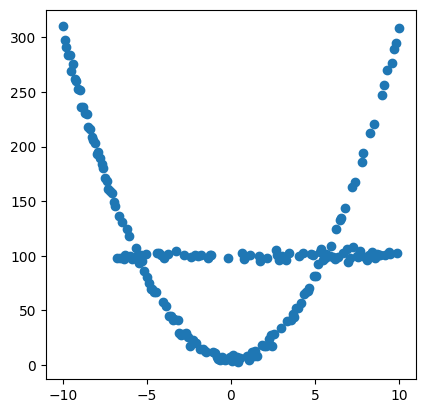

In [364]:

regressor = RANSAC(model=LinearRegressor(), loss=square_error_loss, metric=mean_square_error)
regressor.fit(X, Y)
fig, ax = plt.subplots(1, 1)
ax.set_box_aspect(1)

plt.scatter(X, Y)

line = np.linspace(-1, 1, num=100).reshape(-1, 1)
plt.plot(line, regressor.predict(line), c="peru")
plt.show()

